# Time Series Analysis - Stock Market Analysis

##### `Header - Importing all the packages`

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##### `Constructing data from files`

In [2]:
data_files = ['APPLE_data.csv','GOOGLE_data.csv','MICROSOFT_data.csv','AMAZON_data.csv']
all_data=pd.DataFrame()
for file in data_files:
    df=pd.read_csv(r'./Data/'+file)
    df['Name']=file.split('_')[0]
    all_data=pd.concat([all_data,df])
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,APPLE
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,APPLE
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,APPLE
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,APPLE
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,APPLE


## Analysing Closing price of all stocks

`Getting each company's name and storing into array`

In [3]:
tech_list = all_data['Name'].unique()
tech_list

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

`Enumerating companies with indices`

In [4]:
enum = list(enumerate(tech_list,1))
enum

[(1, 'APPLE'), (2, 'GOOGLE'), (3, 'MICROSOFT'), (4, 'AMAZON')]

`Changing the date type into date-time format`

In [5]:
all_data['date']=pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

`Plotting graphs`

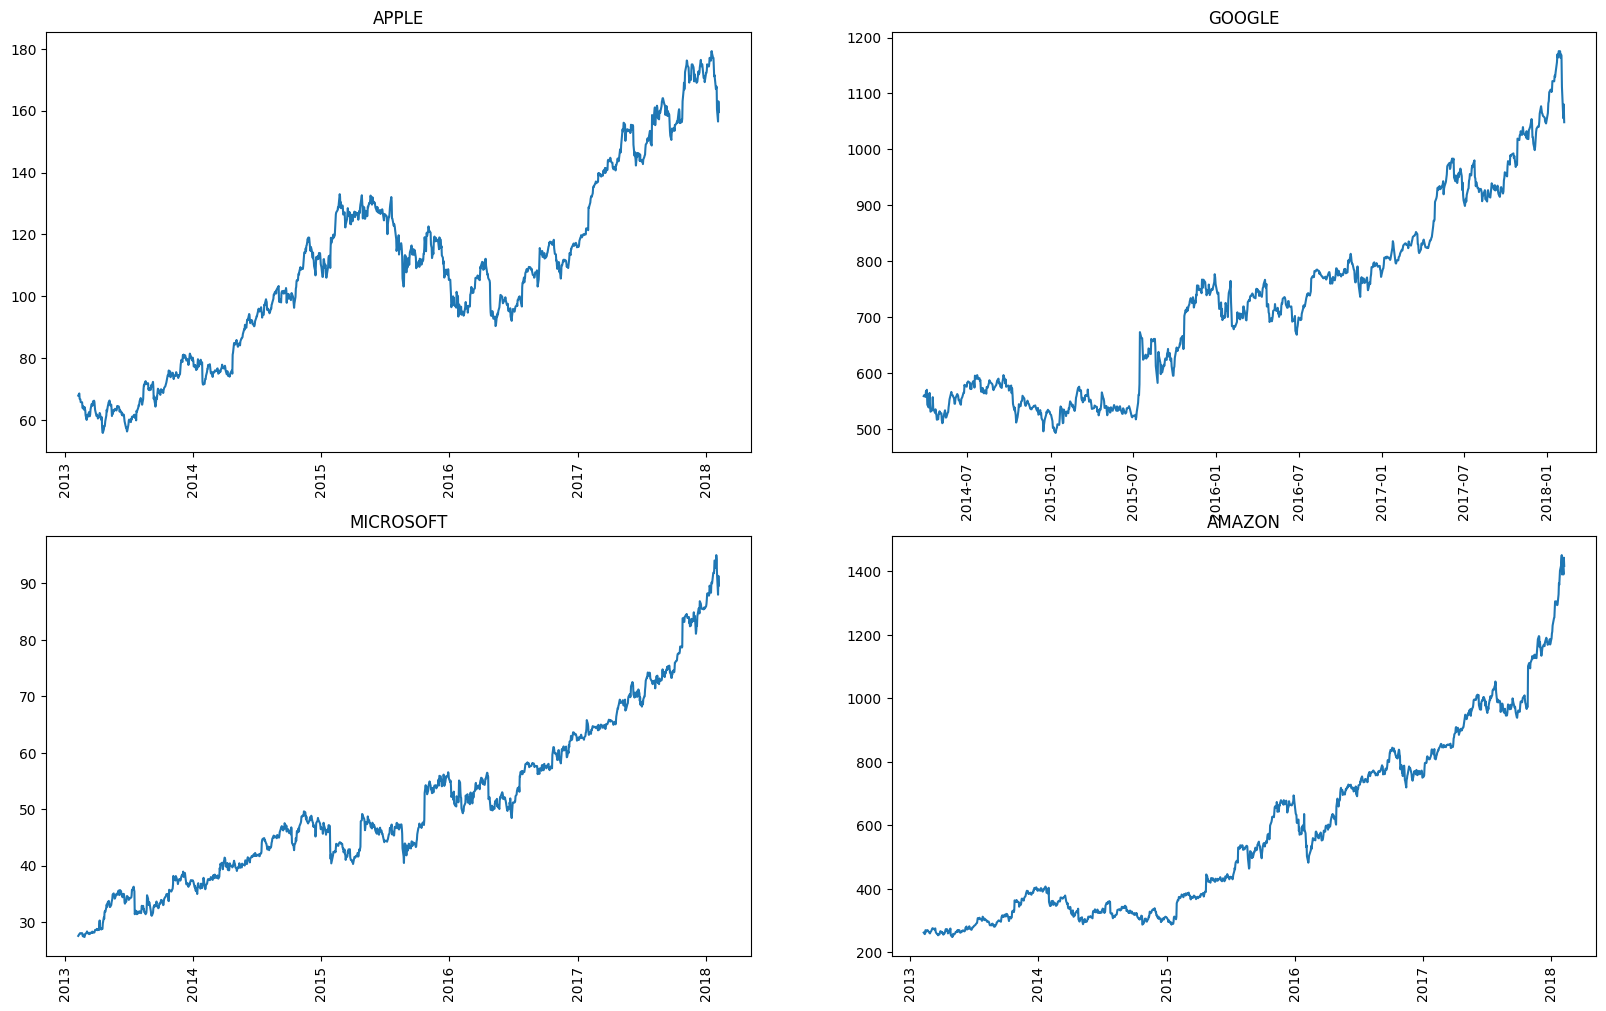

In [6]:
plt.figure(figsize=(20,12))
for index,company in enum:
    plt.subplot(2,2,index)
    company_df=all_data[all_data['Name']==company]
    plt.plot(company_df['date'],company_df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)

## Analysing total volume of stock being traded each day

In [7]:
for company in tech_list:
    company_df=all_data[all_data['Name']==company]
    fig=px.line(company_df,x='date',y='volume',title=company)
    fig.show()

## Analysing daily price change in stock

In [8]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,APPLE
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,APPLE
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,APPLE
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,APPLE
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,APPLE


`Introducing a new column - daily price change`

In [9]:
all_data['daily price change'] = all_data['close']-all_data['open']
all_data.head()

,date,open,high,low,close,volume,Name,daily price change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,APPLE,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,APPLE,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,APPLE,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,APPLE,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,APPLE,0.2957


`Introducing a new colum - daily % return`

`To get this, we need to calculate daily price change/closing price *100`

In [10]:
all_data['daily % return']=(((all_data['close']-all_data['open'])/all_data['close'])*100)
all_data.head()

,date,open,high,low,close,volume,Name,daily price change,daily % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,APPLE,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,APPLE,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,APPLE,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,APPLE,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,APPLE,0.2957,0.443624


`Plotting for each company`

In [11]:
for company in tech_list:
    company_df=all_data[all_data['Name']==company]
    fig=px.line(company_df,x='date',y='daily % return',title=company)
    fig.show()

## Analysing monthly mean of close feature

In [12]:
df2=company_df
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
daily price change           float64
daily % return               float64
dtype: object

In [13]:
df2.head()

,date,open,high,low,close,volume,Name,daily price change,daily % return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMAZON,0.55,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMAZON,-5.99,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMAZON,-0.49,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMAZON,7.94,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMAZON,1.87,0.694548


In [14]:
df2.set_index('date',inplace=True)
df2.head()

,open,high,low,close,volume,Name,daily price change,daily % return
date,,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMAZON,0.55,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMAZON,-5.99,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMAZON,-0.49,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMAZON,7.94,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMAZON,1.87,0.694548


In [15]:
df2['2013-02-08':'2014-02-08']

,open,high,low,close,volume,Name,daily price change,daily % return
date,,,,,,,,
2013-02-08,261.400,265.2500,260.555,261.95,3879078,AMAZON,0.550,0.209964
2013-02-11,263.200,263.2500,256.600,257.21,3403403,AMAZON,-5.990,-2.328836
2013-02-12,259.190,260.1600,257.000,258.70,2938660,AMAZON,-0.490,-0.189409
2013-02-13,261.530,269.9600,260.300,269.47,5292996,AMAZON,7.940,2.946525
2013-02-14,267.370,270.6500,265.400,269.24,3462780,AMAZON,1.870,0.694548
...,...,...,...,...,...,...,...,...
2014-02-03,358.980,360.8500,340.100,346.15,10290934,AMAZON,-12.830,-3.706486
2014-02-04,349.590,353.9975,344.020,347.95,4821177,AMAZON,-1.640,-0.471332
2014-02-05,346.000,349.3700,337.730,346.45,4439010,AMAZON,0.450,0.129889


`Resampling data according to months and applying mean over it`

<Axes: xlabel='date'>

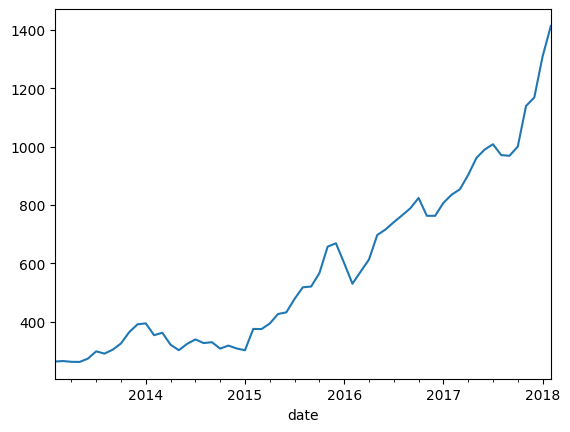

In [16]:
df2['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

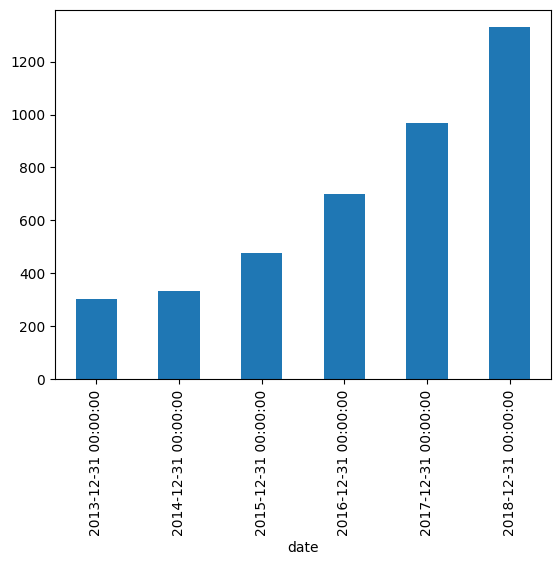

In [17]:
df2['close'].resample('Y').mean().plot(kind='bar')

## Analysing the co-realtion among companies stock prices

`Creating a new dataframe with closing prices of each company`

In [18]:
closing_prices=pd.DataFrame()
for file in data_files:
    company_name=file.split('_')[0]
    company_df=pd.read_csv('./Data/'+file)
    closing_prices[company_name]=company_df['close']
closing_prices.head()

,APPLE,GOOGLE,MICROSOFT,AMAZON
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


`Plotting pair plots and analysing corelations`

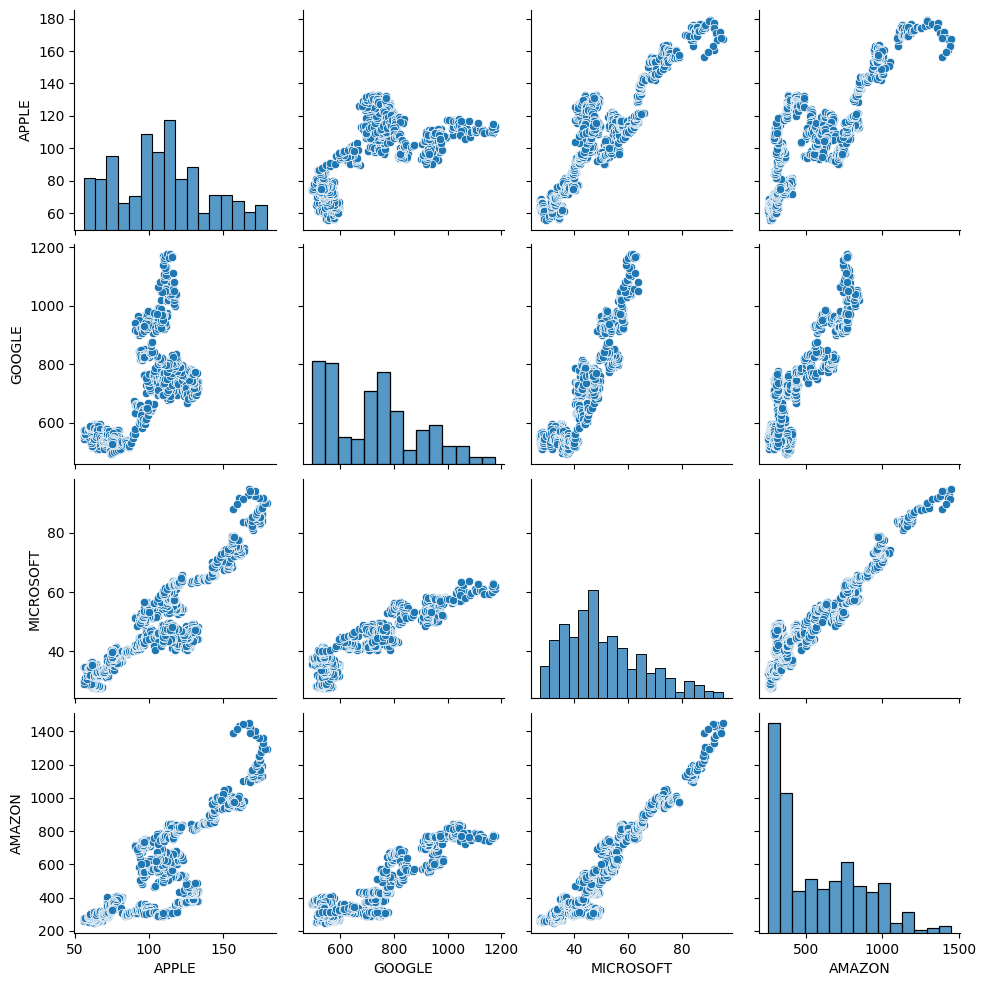

In [19]:
sns.pairplot(data=closing_prices)

**`Conclusion:`** `We can observe that microsft with apple dosent have good corelation and in case of Amazon and microsft they had good corelation.`

`Plotting the heat maps`

<Axes: >

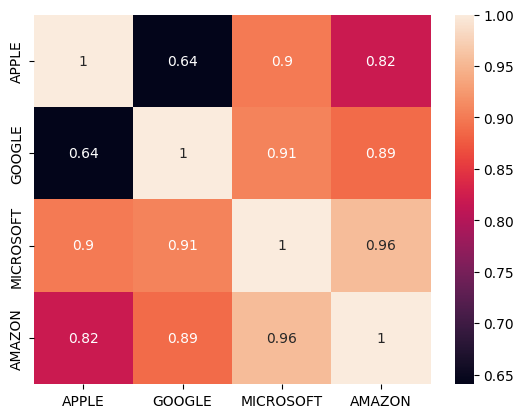

In [20]:
sns.heatmap(closing_prices.corr(),annot=True)

## Analysing Daily returns of each stock and their corelation

`Creating a dataframe with each daily % change`

In [21]:
daily_returns=pd.DataFrame()
for file in data_files:
    company_name=file.split('_')[0]
    company_df=pd.read_csv('./Data/'+file)
    daily_returns[company_name+'_change']=(((company_df['close']-company_df['open'])/company_df['close'])*100)
daily_returns.head()

,APPLE_change,GOOGLE_change,MICROSOFT_change,AMAZON_change
0,0.206325,-1.708269,0.725953,0.209964
1,0.714688,-0.216075,0.753769,-2.328836
2,-2.481344,-1.781065,0.000000,-0.189409
3,-0.042869,1.489879,0.356761,2.946525
4,0.443624,0.334039,0.427960,0.694548


`Plotting pair plot to analyse corelations`

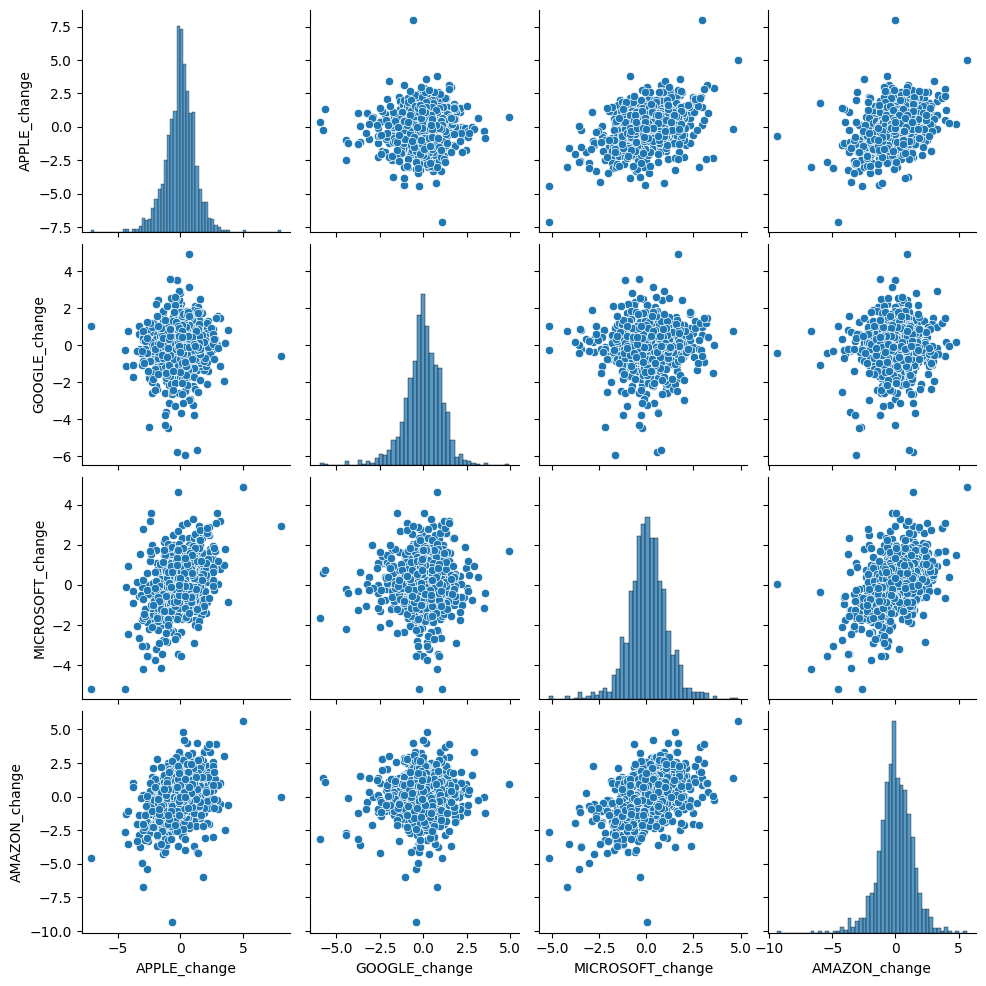

In [22]:
sns.pairplot(data=daily_returns)

`heat map`

<Axes: >

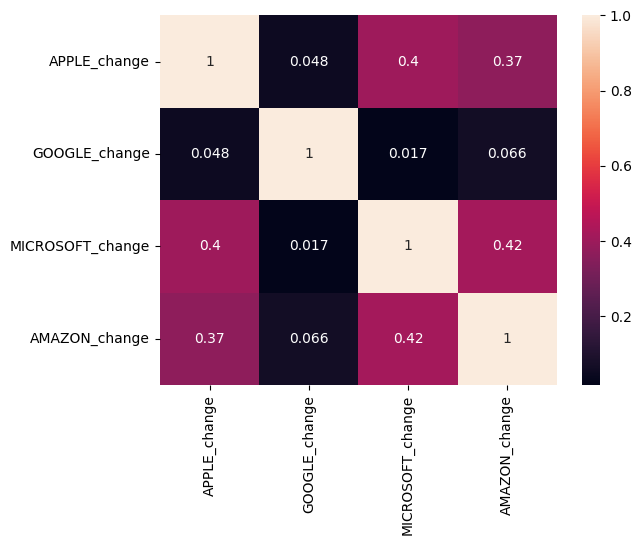

In [23]:
sns.heatmap(daily_returns.corr(),annot=True)

## Risk Analysis for tech companies

C:\Users\ravin\AppData\Local\Temp\ipykernel_6872\2988084507.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='APPLE_change', ylabel='Density'>

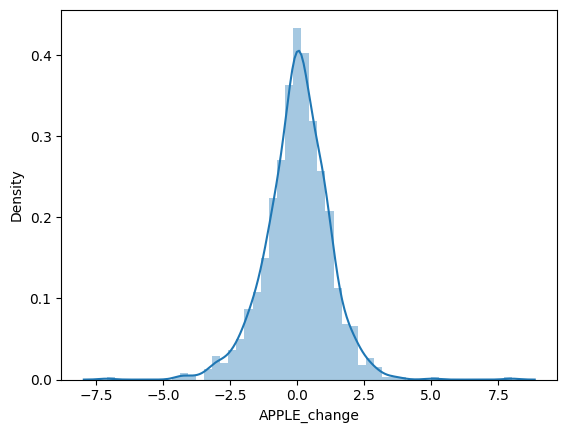

In [24]:
sns.distplot(daily_returns['APPLE_change'])

`68% of entire data lies in the (-std,std) where std is standard deviation`

`Similarly, 95% data in (-2*std,2*std) and 99.7% in (-3*std,3*std).`

In [25]:
daily_returns['APPLE_change'].std()

1.1871377131421237

In [26]:
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
APPLE_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
GOOGLE_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
MICROSOFT_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
AMAZON_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
